<a href="https://colab.research.google.com/github/whylucify1/ABC-Fuzzy-string/blob/main/ABC_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install piml "pandas<=2.0" "numpy<1.24" "xgboost<1.7.3" "pygam<0.9.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.7 MB/s eta 0:00

In [1]:
########################################################################
#                                                                      #
# "Runtime" -> "Restart Runtime" DUE TO SOME BUG - then run this cell  #
#                                                                      #
########################################################################
from piml import Experiment
exp = Experiment()

In [2]:
import io 
from google.colab import files
uploaded=files.upload()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Saving full_final_names.csv to full_final_names.csv


In [3]:
import pandas as pd 
data = pd.read_csv(io.StringIO(uploaded['full_final_names.csv'].decode('utf-8')))
data = data[['UID', 'Theme', 'Category', 'Sub-category', 'Entity-Type', 'Original Name', 'Test Case Name']]

data.head(5)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name
0,1,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Daniel Griffin,Daniel Griffin
1,2,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Thomas Archer,Thomas Archer
2,3,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Stacy Yang,Stacy Yang
3,4,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Paul Williamson,Paul Williamson
4,5,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Mr. Shawn Long,Mr. Shawn Long


In [4]:
import numpy as np
data['Label']=np.where(data['Theme'] != 'No Name Match', 1, 0)
data.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name,Label
0,1,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Daniel Griffin,Daniel Griffin,1
1,2,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Thomas Archer,Thomas Archer,1
2,3,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Stacy Yang,Stacy Yang,1
3,4,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Paul Williamson,Paul Williamson,1
4,5,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Mr. Shawn Long,Mr. Shawn Long,1


In [5]:
!pip install h2o

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697898 sha256=f287d358c62d4cf4b7b8ebdcee915ce5235dc348be86cbec81521c936035b413
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


In [6]:
import h2o
h2o.init()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy1z65b6u
  JVM stdout: /tmp/tmpy1z65b6u/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy1z65b6u/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_zynafq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [7]:
hdata=h2o.H2OFrame(data)
hdata

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name,Label
1,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Daniel Griffin,Daniel Griffin,1
2,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Thomas Archer,Thomas Archer,1
3,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Stacy Yang,Stacy Yang,1
4,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Paul Williamson,Paul Williamson,1
5,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Mr. Shawn Long,Mr. Shawn Long,1
6,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Jesus Carter,Jesus Carter,1
7,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Andrew Fleming,Andrew Fleming,1
8,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Brett Guerrero,Brett Guerrero,1
9,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Courtney Rodriguez,Courtney Rodriguez,1
10,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Patrick Atkinson,Patrick Atkinson,1


In [8]:
for measure_ in ['lv', 'lcs', 'qgram', 'jaccard', 'jw', 'soundex']:
  hdata[measure_]=1-hdata['Original Name'].strdistance(hdata['Test Case Name'], measure=measure_)

hdata

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name,Label,lv,lcs,qgram,jaccard,jw,soundex
1,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Daniel Griffin,Daniel Griffin,1,0,0,0,0,0,0
2,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Thomas Archer,Thomas Archer,1,0,0,0,0,0,0
3,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Stacy Yang,Stacy Yang,1,0,0,0,0,0,0
4,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Paul Williamson,Paul Williamson,1,0,0,0,0,0,0
5,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Mr. Shawn Long,Mr. Shawn Long,1,0,0,0,0,0,0
6,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Jesus Carter,Jesus Carter,1,0,0,0,0,0,0
7,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Andrew Fleming,Andrew Fleming,1,0,0,0,0,0,0
8,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Brett Guerrero,Brett Guerrero,1,0,0,0,0,0,0
9,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Courtney Rodriguez,Courtney Rodriguez,1,0,0,0,0,0,0
10,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Patrick Atkinson,Patrick Atkinson,1,0,0,0,0,0,0


In [9]:
data = hdata.as_data_frame()
data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name,Label,lv,lcs,qgram,jaccard,jw,soundex
0,1.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Daniel Griffin,Daniel Griffin,1,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,2.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Thomas Archer,Thomas Archer,1,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,3.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Stacy Yang,Stacy Yang,1,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,4.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Paul Williamson,Paul Williamson,1,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,5.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Mr. Shawn Long,Mr. Shawn Long,1,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162603,NaN,No Name Match,No Name Match,No Name Match,Individual,Deborah Cummings,David Moreno,0,0.812500,0.833333,0.909091,1.0,0.379464,1.0
162604,NaN,No Name Match,No Name Match,No Name Match,Individual,Amy Williams,Kathleen Brooks,0,0.933333,1.000000,1.000000,1.0,0.627778,1.0
162605,NaN,No Name Match,No Name Match,No Name Match,Individual,Mercedes Hudson,Jasmine Pugh,0,0.800000,1.000000,1.000000,1.0,0.550000,1.0
162606,NaN,No Name Match,No Name Match,No Name Match,Individual,Whitney Walsh,Robert Francis,0,0.928571,1.000000,1.000000,1.0,0.425519,1.0


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

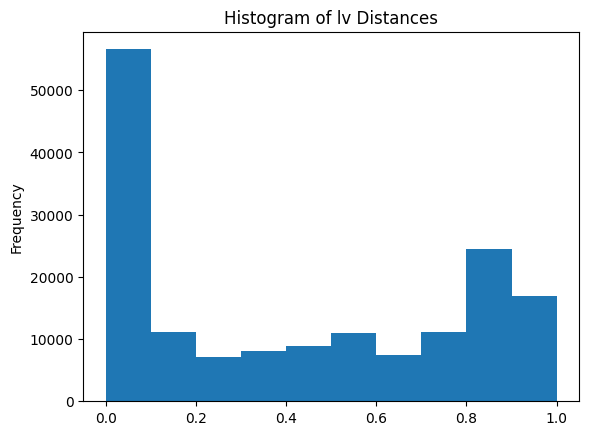

In [10]:
_ = data['lv'].plot(kind='hist', title='Histogram of lv Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

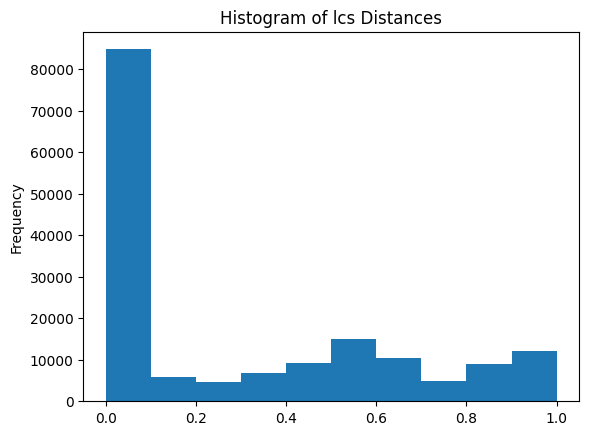

In [11]:
_ = data['lcs'].plot(kind='hist', title='Histogram of lcs Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

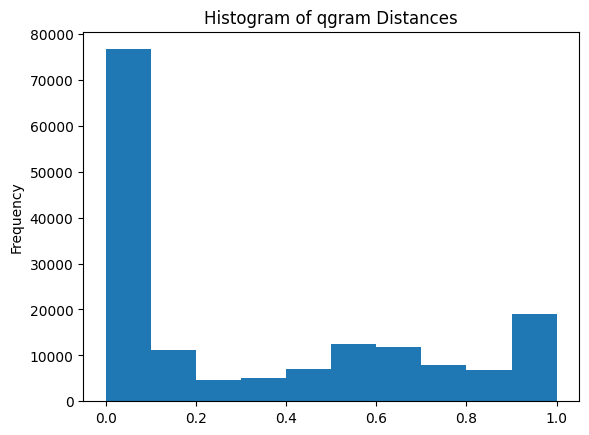

In [12]:
_ = data['qgram'].plot(kind='hist', title='Histogram of qgram Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

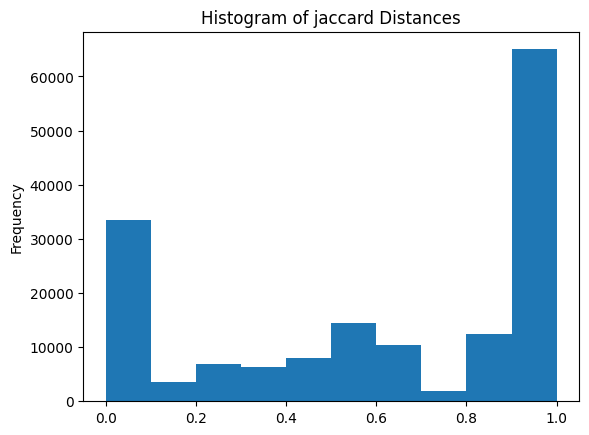

In [13]:
_ = data['jaccard'].plot(kind='hist', title='Histogram of jaccard Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

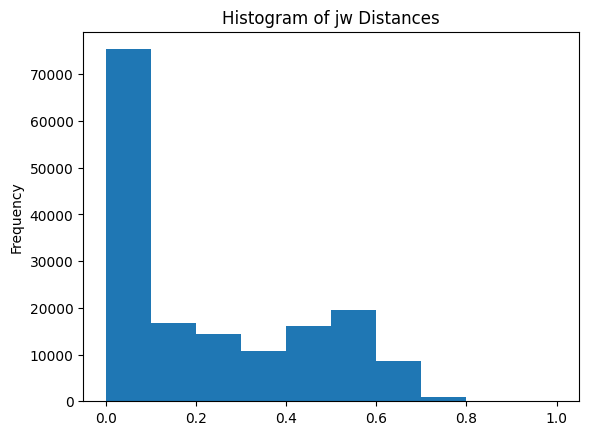

In [14]:
_ = data['jw'].plot(kind='hist', title='Histogram of jw Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

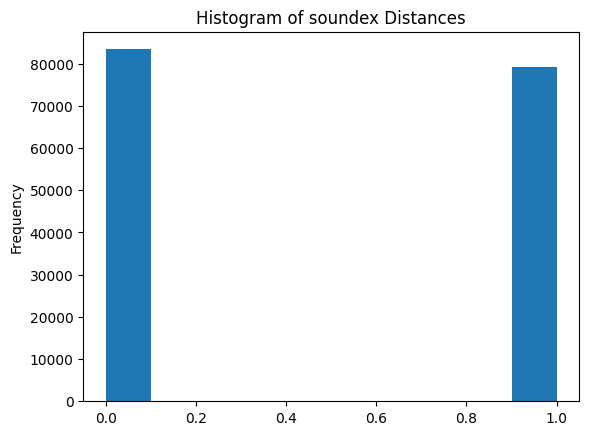

In [15]:
_ = data['soundex'].plot(kind='hist', title='Histogram of soundex Distances')

In [16]:
import numpy as np
data['target'] = 0
data['target'] = data['Label']
data[['Label', 'target']]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Label,target
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
162603,0,0
162604,0,0
162605,0,0
162606,0,0


In [17]:
exp.data_loader(data=data)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name,Label,lv,lcs,qgram,jaccard,jw,soundex,target
0,1.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Daniel Griffin,Daniel Griffin,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Thomas Archer,Thomas Archer,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Stacy Yang,Stacy Yang,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Paul Williamson,Paul Williamson,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Mr. Shawn Long,Mr. Shawn Long,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162603,NaN,No Name Match,No Name Match,No Name Match,Individual,Deborah Cummings,David Moreno,0.0,0.8125,0.833333,0.909091,1.0,0.379464,1.0,0.0
162604,NaN,No Name Match,No Name Match,No Name Match,Individual,Amy Williams,Kathleen Brooks,0.0,0.933333,1.0,1.0,1.0,0.627778,1.0,0.0
162605,NaN,No Name Match,No Name Match,No Name Match,Individual,Mercedes Hudson,Jasmine Pugh,0.0,0.8,1.0,1.0,1.0,0.55,1.0,0.0
162606,NaN,No Name Match,No Name Match,No Name Match,Individual,Whitney Walsh,Robert Francis,0.0,0.928571,1.0,1.0,1.0,0.425519,1.0,0.0


In [18]:
exp.data_summary()
# soundex --> numerical
# exclude --> UID, Theme, Category, Sub-category, Entity-Type, Original Name, Test Case Name, lv (have to drop lv or models don't work)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [19]:
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [20]:
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [21]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [22]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [23]:
x_names = ['lv', 'lcs', 'qgram', 'jaccard', 'jw', 'soundex']
print(exp.experiment.registered_pipeline['EBM'].predict_proba(data[x_names].values))
print(exp.experiment.registered_pipeline['EBM'].predict_proba(data[x_names].values)[:, 1])
data['preds'] = exp.experiment.registered_pipeline['EBM'].predict_proba(data[x_names].values)[:, 1]
data.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[[3.96486396e-18 1.00000000e+00]
 [3.96486396e-18 1.00000000e+00]
 [3.96486396e-18 1.00000000e+00]
 ...
 [9.83622722e-01 1.63772775e-02]
 [9.36760758e-01 6.32392423e-02]
 [9.77927910e-01 2.20720904e-02]]
[1.         1.         1.         ... 0.01637728 0.06323924 0.02207209]


,UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name,Label,lv,lcs,qgram,jaccard,jw,soundex,target,preds
0,1.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Daniel Griffin,Daniel Griffin,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Thomas Archer,Thomas Archer,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,3.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Stacy Yang,Stacy Yang,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,4.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Paul Williamson,Paul Williamson,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,5.0,Exact Name Match,Exact Name Match,Exact Name Match,Individual,Mr. Shawn Long,Mr. Shawn Long,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [24]:
!pip install -U scikit-learn

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from sklearn.metrics import accuracy_score

for level in data['Theme'].unique():
    y_true = data.loc[data['Theme'] == level, 'target']
    y_pred = data.loc[data['Theme'] == level, 'preds'].round().astype(int)
    score = accuracy_score(y_true, y_pred)
    print(f"Accuracy for {level}: {score}")


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Accuracy for Exact Name Match: 1.0
Accuracy for Modified Order: 0.9981718464351006
Accuracy for Different Name Parts: 0.9946172248803827
Accuracy for Name Additions: 0.9970320665849409
Accuracy for Name Part Variations: 0.9204141554628342
Accuracy for Names where Name Parts are Modified: 0.9835690691962395
Accuracy for Special Characters and Spaces: 0.9969369946931652
Accuracy for Name Deletions: 0.9627041920881716
Accuracy for Given Name and Last Name Swapped: 0.982
Accuracy for nan: nan
Accuracy for No Name Match: 0.9511343051841629
